# Group Work Submission 3
Building Trading Strategies During COVID

* Select a gold Exchange Traded Fund: GLD SPDR Gold Shares [NYSE],
* Select an equity ETF from outside the US: EXS1 Shares Core DAX UCITS ETF (DE),
* Select bitcoin BTC-USD (CoinMarketCap. Currency in USD).

In [1]:
import quandl
import pandas as pd
import pandas_datareader.data as reader
import datetime as dt
import statsmodels.api as sm
import yfinance as yf
from pandas_datareader import data as pdr
import numpy as np
from numpy import mean
from numpy import cov
import statistics
import matplotlib as plt
import matplotlib.pyplot as plt
import mplfinance as mpf
from matplotlib import rcParams
import statsmodels
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from arch import arch_model
import statsmodels.tsa.stattools as sts
from arch.unitroot import engle_granger
from random import gauss
from statsmodels.tsa.vector_ar.vecm import VECM
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import coint
from scipy.stats import kurtosis
from scipy.signal import argrelextrema
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from copulalib.copulalib import Copula
from math import sqrt
import copulae
from copulae import StudentCopula
from sklearn.metrics import mean_squared_error
from random import random
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
import quantstats as qs
import warnings
warnings.filterwarnings('ignore')

# Data Importing
Import closing prices for the entire year of 2020 for your GOLD ETF, your equity ETF, and bitcoin.

In [2]:
FullGoldETF = pdr.get_data_yahoo("GLD", start="2020-01-01", end="2020-12-31")
FullStockETF = pdr.get_data_yahoo("EXS1.DE", start="2020-01-01", end="2020-12-31")
FullBTC = pdr.get_data_yahoo("BTC-USD", start="2020-01-01", end="2020-12-30")

* Import your gold ETF prices for the months of April 2020 through Dec 2020.
* Import your equity ETF prices for the months of April 2020 through Dec 2020.
* Import your bitcoin prices for the months of April 2020 through Dec 2020.

In [3]:
GoldETF = pdr.get_data_yahoo("GLD", start="2020-04-01", end="2020-12-31")
#NYSE was closed on Thursday, 26 November & 25 Maj
#Saved the data in csv
#GoldETF.to_csv("GLD.csv")

In [4]:
StockETF = pdr.get_data_yahoo("EXS1.DE", start="2020-04-01", end="2020-12-31")
#Dax was closed on Apr 13, 2020, Apr 10, 2020, May 01, 2020, Jun 01, 2020, Dec 24-25, 2020, Dec 31, 2020
#Saved the data in csv
#StockETF.to_csv("StockETF.csv")

In [5]:
BTC = pdr.get_data_yahoo("BTC-USD", start="2020-04-02", end="2020-12-30")
#If I import from 2020-04-01 to 2020-12-31, it includes 31st of March and 1st of Jan
#Saved the data in csv
#BTC.to_csv("BTC.csv")

# Data Processing

In [6]:
GoldETF['Log Returns'] = np.log(GoldETF['Adj Close']) - np.log(GoldETF['Adj Close'].shift(1))
StockETF['Log Returns'] = np.log(StockETF['Adj Close']) - np.log(StockETF['Adj Close'].shift(1))
BTC['Log Returns'] = np.log(BTC['Adj Close']) - np.log(BTC['Adj Close'].shift(1))

In [7]:
GoldETF #Gold returns

,High,Low,Open,Close,Volume,Adj Close,Log Returns
Date,,,,,,,
2020-04-01,150.080002,147.850006,148.199997,149.449997,11827400,149.449997,NaN
2020-04-02,152.500000,150.699997,151.199997,151.899994,9188300,151.899994,0.016261
2020-04-03,153.089996,151.660004,152.229996,152.649994,8469100,152.649994,0.004925
2020-04-06,157.220001,153.960007,154.160004,156.880005,14739300,156.880005,0.027334
2020-04-07,156.139999,154.380005,155.330002,156.039993,9195400,156.039993,-0.005369
...,...,...,...,...,...,...,...
2020-12-24,176.369995,175.509995,175.550003,176.350006,3695400,176.350006,0.003977
2020-12-28,177.910004,175.630005,177.259995,175.710007,7778700,175.710007,-0.003636
2020-12-29,176.970001,175.570007,176.250000,176.350006,5983700,176.350006,0.003636


In [8]:
StockETF #ESX1 returns

,High,Low,Open,Close,Volume,Adj Close,Log Returns
Date,,,,,,,
2020-04-01,82.900002,81.269997,82.489998,81.709999,656215,81.709999,NaN
2020-04-02,82.639999,79.940002,82.040001,82.010002,690442,82.010002,0.003665
2020-04-03,82.300003,81.150002,81.599998,81.500000,252129,81.500000,-0.006238
2020-04-06,86.379997,84.279999,84.690002,86.190002,655371,86.190002,0.055951
2020-04-07,90.660004,87.480003,89.570000,88.669998,843503,88.669998,0.028367
...,...,...,...,...,...,...,...
2020-12-22,114.459999,113.459999,113.519997,114.220001,154888,114.220001,0.010916
2020-12-23,115.900002,114.800003,114.919998,115.760002,143214,115.760002,0.013393
2020-12-28,117.760002,117.059998,117.300003,117.440002,150514,117.440002,0.014408


In [9]:
BTC #BTC returns

,High,Low,Open,Close,Volume,Adj Close,Log Returns
Date,,,,,,,
2020-04-01,7088.247559,6595.918457,6606.776367,6793.624512,4.766065e+10,6793.624512,NaN
2020-04-02,7003.220703,6673.335938,6797.396484,6733.387207,3.897650e+10,6733.387207,-0.008906
2020-04-03,6878.953613,6696.484863,6738.382812,6867.527344,3.318599e+10,6867.527344,0.019726
2020-04-04,6883.414062,6715.929199,6862.537598,6791.129395,2.951041e+10,6791.129395,-0.011187
2020-04-05,7271.781250,6782.889648,6788.049805,7271.781250,4.689690e+10,7271.781250,0.068384
...,...,...,...,...,...,...,...
2020-12-27,28288.839844,25922.769531,26439.373047,26272.294922,6.647990e+10,26272.294922,-0.006251
2020-12-28,27389.111328,26207.640625,26280.822266,27084.808594,4.905674e+10,27084.808594,0.030458
2020-12-29,27370.720703,25987.298828,27081.810547,27362.437500,4.526595e+10,27362.437500,0.010198


# Data Summaries.  Kurtosis.

Compute the kurtosis for each series.

In [10]:
kurtosis(GoldETF['Log Returns'].dropna())

4.1892827198643845

In [11]:
kurtosis(StockETF['Log Returns'].dropna())

1.522665361031228

In [12]:
kurtosis(BTC['Log Returns'].dropna())

2.675141571804507

# Extreme Values

We picked DBSCAN as it is a good algorithm for clustering data to groups. We can use it to identify extreme values. It groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away). DBSCAN is one of the most common clustering algorithms and also most cited in scientific literature.

* From 1st Arpil till 31st of Dec.

In [13]:
EXVGold = pd.concat([GoldETF['Adj Close'], GoldETF['Log Returns']], axis=1, keys=['Adj Close', 'Log Returns']).fillna(0).values
EXVStockETF = pd.concat([StockETF['Adj Close'], StockETF['Log Returns']], axis=1, keys=['Adj Close', 'Log Returns']).fillna(0).values
EXVBTC = pd.concat([BTC['Adj Close'], BTC['Log Returns']], axis=1, keys=['Adj Close', 'Log Returns']).fillna(0).values

In [14]:
def dbscan(x, eps, min_samples):
    ss = StandardScaler()
    x = ss.fit_transform(x)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(x)
    y_pred = db.fit_predict(x)
    plt.scatter(x[:,0], x[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")

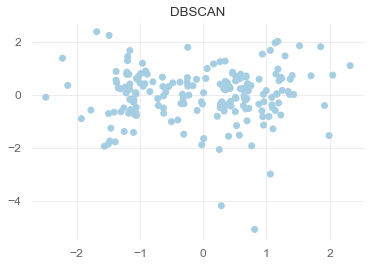

In [15]:
dbscan(EXVGold, eps=1.7, min_samples=2)

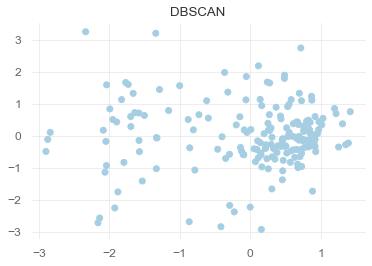

In [16]:
dbscan(EXVStockETF, eps=1.7, min_samples=2)

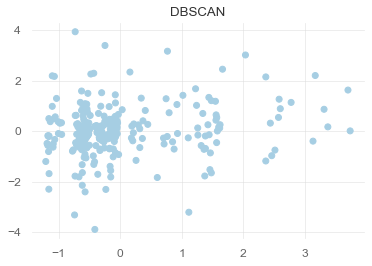

In [17]:
dbscan(EXVBTC, eps=1.7, min_samples=2)

# Data Comparison.  

Graph between Equity (ESX1) ETF daily return and Bitcoin daily return.

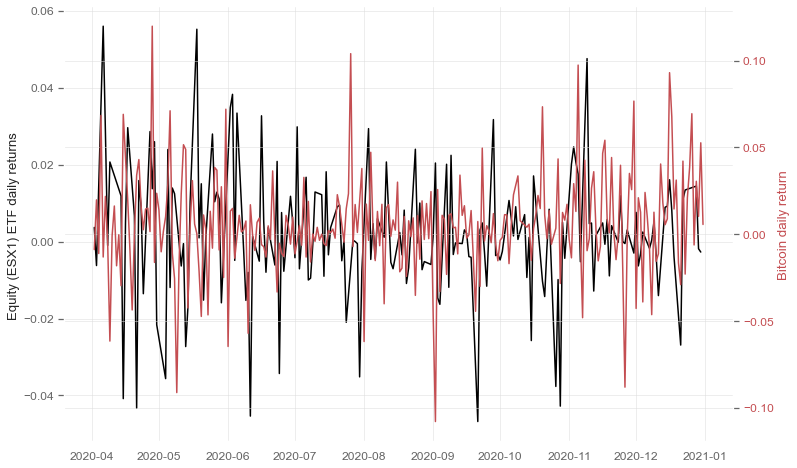

In [18]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
ax1.plot(StockETF['Log Returns'], 'black')
ax1.set_ylabel('Equity (ESX1) ETF daily returns ')

ax2 = ax1.twinx()
ax2.plot(BTC['Log Returns'], 'r-')
ax2.set_ylabel('Bitcoin daily return', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

# Copulas

(https://copulae.readthedocs.io/en/latest/examples/usage_guide.html)

* We choose Student's T copula, and Picked Equity (ESX1) ETF & Bitcoin.
* Run From 1st Arpil till 31st of Dec.

In [19]:
residuals = pd.concat([BTC['Log Returns'], StockETF['Log Returns']], axis=1,).fillna(0).values
t_cop = StudentCopula(dim=2)
t_cop.fit(residuals)
t_cop.summary()
#t_cop.params

Student Copula Summary
================================================================================
Student Copula with 2 dimensions


Parameters
--------------------------------------------------------------------------------
 Degree of Freedom  : 83.90684859970585

 Correlation Matrix 
 1.000000 -0.083052
-0.083052  1.000000



                                  Fit Summary                                   
================================================================================
Log. Likelihood      : 0.8323932857429304
Variance Estimate    : Not Implemented Yet
Method               : Maximum likelihood
Data Points          : 273

Optimization Setup
--------------------------------------------------------------------------------
	bounds         : [(0.0, inf), (-1.000001, 1.000001)]
	options        : {'maxiter': 20000, 'ftol': 1e-06, 'iprint': 1, 'disp': False, 'eps': 1.5e-08}
	method         : SLSQP

Results
--------------------------------------------------------------------------------
	x              : [ 8.39068486e+01 -8.30518205e-02]
	fun            : -0.8323932857429304
	jac            : [ 0.00036655 -0.03521251]
	nit            : 16
	nfev           : 61
	njev           : 16
	status         : 0
	message        : Optimization terminated successfully
	success        : True

In [20]:
BTCweek = BTC[BTC.index.dayofweek < 5] #Removing weekends
BTCplot = BTCweek.drop(BTCweek.index[[7,8,21,168,189]]) # Drop due to Dax Holidays
Stockplot = StockETF.drop(StockETF.index[[9]]) # Drop 16 April

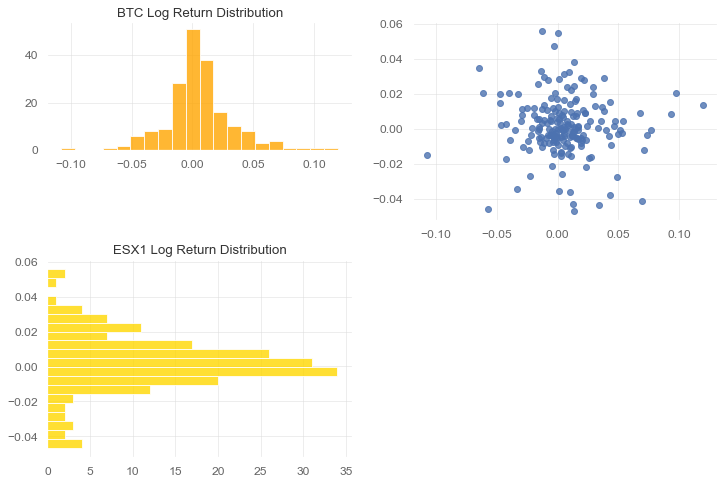

In [21]:
x = (BTCplot['Log Returns']).fillna(0).values
y = (Stockplot['Log Returns']).fillna(0).values
fig = plt.figure(figsize=(12,8))
fig.add_subplot(3,2,1)
plt.hist(x,bins=20,color='orange',alpha=0.8,align='mid')
plt.title('BTC Log Return Distribution')
fig.add_subplot(2,2,2)
plt.scatter(x,y,marker="o",alpha=0.8)
fig.add_subplot(2,2,3)
plt.title('Close & Returns')
plt.hist(y,bins=20,orientation='horizontal',color='gold',alpha=0.8,align='mid')
plt.title('ESX1 Log Return Distribution')    
plt.show()

# Category 1 Models: Just use 1 variable.

https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

* We picked Gold ETF.

First ARMA strategy: We used prediction based on price, instead of returns, because predictions based retunrs did not provide us reasonable return.

After checking the whole data set for stationary using ADF, we concluded that Gold prices are non-stationary. Thus we picked a simple ARIMA model with the lowest AIC.
 
Using Q2 data for estimation, and Q3 data for evaluating performance.

*https://www.morningstar.com/etfs/arcx/gld/risk

In [22]:
sts.adfuller(GoldETF['Adj Close']) #checking for stationary, data is non-stationary

(-2.4720476656080406,
 0.1224243906751008,
 0,
 190,
 {'1%': -3.4652439354133255,
  '5%': -2.8768752281673717,
  '10%': -2.574944653739612},
 723.8323147755832)

In [23]:
Q2train = GoldETF['Adj Close'].iloc[0: 63]  #Q2 data
Q3test = GoldETF['Adj Close'].iloc[63: 127] #Q3 data

In [24]:
Q2model = ARIMA(Q2train, order=(1,1,1))
Q2modelresult = Q2model.fit()
Q2modelresult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Adj Close   No. Observations:                   62
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -117.365
Method:                       css-mle   S.D. of innovations              1.584
Date:                Mon, 26 Apr 2021   AIC                            242.731
Time:                        10:54:31   BIC                            251.240
Sample:                             1   HQIC                           246.072
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1939      0.068      2.851      0.004       0.061       0.327
ar.L1.D.Adj Close     0.8556      0.096      8.949      0.000       0.668       1.043
ma.L1.D.Adj Close    -1.0000      0.049    -20.491      0.000      -1.096      -0.904
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1688           +0.0000j            1.1688            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

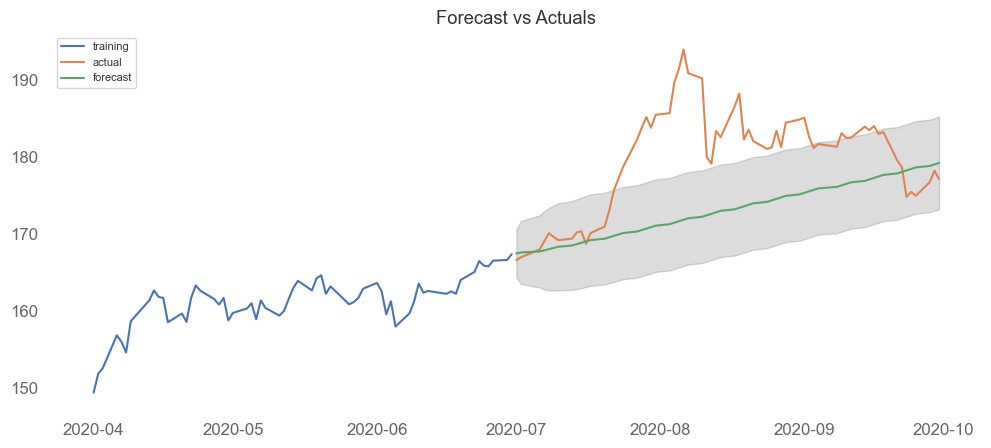

In [25]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(Q2train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(64, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=Q3test.index)
lower_series = pd.Series(conf[:, 0], index=Q3test.index)
upper_series = pd.Series(conf[:, 1], index=Q3test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Q2train, label='training')
plt.plot(Q3test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.grid()
plt.show()

As we can see the price shoot up in Q3, by middle of Aug, it`s quite far from our forecasted price, however by end of Q3 the price reverted bact to our forecasted price. 

(*10-year Standard Deviation: 16.34)

Thus we will use our forecast as a mean price, and appling a mean reverting strategy:

* We short 100 shares if Gold price is above by 16.34 (SD) relative to our forecasted price, close 100 share position once Gold prices reverts back and or drops below to our forecast/mean price.
* We buy 100 shares if Gold price is below by 16.34 (SD) relative to our forecasted price, close 100 share position once Gold prices reverts back and or goes above to our forecast/mean price.


In [26]:
SD = 16.34 #10-year Standard Deviation
forcastprice = pd.Series(fc, index=Q3test.index)
difference = Q3test - forcastprice
for i in difference:
    if i > SD:  #Enter Short
        print("Short 100 Shares")
    elif i < (SD*-1):  #Enter Short
        print("Buy 100 Shares")
    if i < -1:  #Prices are not equal thus setting a lower range
        print("Close All postions")

Short 100 Shares
Short 100 Shares
Short 100 Shares
Short 100 Shares
Short 100 Shares
Close All postions
Close All postions
Close All postions
Close All postions
Close All postions


5 short signals and 5 closing signals in Q3, no buy signals. Overall our AVG entry price: 191.41 & AVG Take profit 175.79.
Return in Q3 is 8.8%.

* 2020-08-04 Sell at: 189.589996
* 2020-08-05 Sell at: 191.350006
* 2020-08-06 Sell at: 193.889999
* 2020-08-07 Sell at: 190.809998
* 2020-08-10 Sell at: 190.149994

* 2020-09-23 Buy at: 174.789993
* 2020-09-24 Buy at: 175.440002
* 2020-09-25 Buy at: 174.940002
* 2020-09-28 Buy at: 176.699997
* 2020-09-30 Buy at: 177.119995

Using Q3 data for estimation, and Q4 data for evaluating performance. After runnin some tests, we found ARIMA (2,1,3) is the best fit model, as AIC is lowest, also most P values are below 0.05.

In [27]:
trainQ3 = GoldETF['Adj Close'].iloc[63: 127]  #Q3 data
Q4test = GoldETF['Adj Close'].iloc[127: 191]  #Q4 data

In [28]:
Q3model = ARIMA(trainQ3, order=(2,1,3))
Q3modelresult = Q3model.fit()
Q3modelresult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Adj Close   No. Observations:                   63
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -137.146
Method:                       css-mle   S.D. of innovations              2.065
Date:                Mon, 26 Apr 2021   AIC                            288.292
Time:                        10:54:31   BIC                            303.294
Sample:                             1   HQIC                           294.192
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1721      0.319      0.540      0.589      -0.453       0.797
ar.L1.D.Adj Close    -0.6663      0.121     -5.485      0.000      -0.904      -0.428
ar.L2.D.Adj Close    -0.8072      0.096     -8.435      0.000      -0.995      -0.620
ma.L1.D.Adj Close     0.7300      0.155      4.703      0.000       0.426       1.034
ma.L2.D.Adj Close     1.1073      0.024     45.371      0.000       1.059       1.155
ma.L3.D.Adj Close     0.2040      0.135      1.514      0.130      -0.060       0.468
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.4127           -1.0337j            1.1130           -0.3105
AR.2           -0.4127           +1.0337j            1.1130            0.3105
MA.1           -0.2630           -0.9648j            1.0000           -0.2923
MA.2           -0.2630           +0.9648j            1.0000            0.2923
MA.3           -4.9011           -0.0000j            4.9011           -0.5000
-----------------------------------------------------------------------------
"""

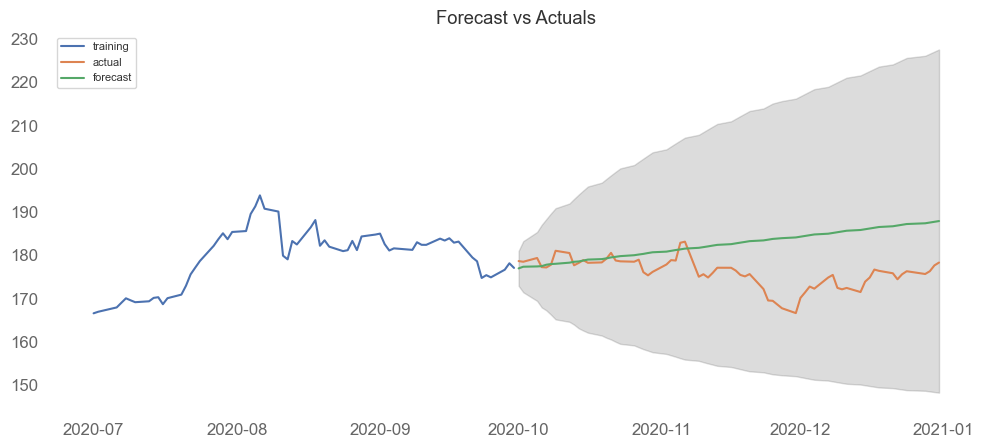

In [29]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(trainQ3, order=(2, 1, 3))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(64, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=Q4test.index)
lower_series = pd.Series(conf[:, 0], index=Q4test.index)
upper_series = pd.Series(conf[:, 1], index=Q4test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(trainQ3, label='training')
plt.plot(Q4test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.grid()
plt.show()

As we can see our model did not predict well the Gold price move, however, we can apply our mean reverting strategy again.
In Q4, Gold price was moving under our forecasted price.

(*10-year Standard Deviation: 16.34)

Thus we will use our forecast as a mean price, and appling a mean reverting strategy:

* We short 100 shares if Gold price is above by 16.34 (SD) relative to our forecasted price, close all position once Gold prices reverts back and or drops below to our forecast/mean price.
* We buy 100 shares if Gold price is below by 16.34 (SD) relative to our forecasted price, close all position once Gold prices reverts back and or goes above to our forecast/mean price.

In [30]:
SD = 16.34 #10-year Standard Deviation
Q4forcastprice = pd.Series(fc, index=Q4test.index)
Q4difference = Q4test - Q4forcastprice
for i in Q4difference:
    if i > SD:  #Enter Short
        print("Short 100 Shares")
    elif i < (SD*-1):  #Enter Short
        print("Buy 100 Shares")
    #if i < -1:  #Prices are not equal thus setting a lower range
        #print("Close All postions")

Buy 100 Shares


One Buy signal in Q4, no close singal, we are still in position. So, we are running 7% unrealized profit.


* 2020-11-30 Buy at: 166.669998
* 2020-12-31 Q4 Last price 178.360001

# Second strategy some form of GARCH.

Second strategy is a simple GJR-GARCH.

Using Q2 data for estimation, and Q3 data for evaluating performance. We found GARCH (1,1) is the best fit as higher lag models do not improve any stat values like AIC or Loglikelihood. 

In [31]:
Q2GoldReturn = GoldETF['Log Returns'].iloc[0: 63].dropna() #Q2 data
Q3GoldReturn = GoldETF['Log Returns'].iloc[63: 126] #Q3 data
Q4GoldReturn = GoldETF['Log Returns'].iloc[127: 191] #Q4 data

In [32]:
window = 10
forecastLen = len(Q2GoldReturn) - window
forecast = [0]*forecastLen
direction = [0]*forecastLen

In [33]:
for i in range(0,forecastLen):
    ret = Q2GoldReturn[(1+i):(window + i + 1)]
    model = arch_model(ret, mean = 'constant', vol = 'GARCH', p=1, o=1, q=1, power=2, dist = 'normal', rescale = True)
    model_fit = model.fit()
    yht = model_fit.forecast(horizon = 1)
    forecast[i] = yht.mean.iloc[0][0]
    if yht.mean.iloc[0][0] > 0:  
        direction[i] = 1 
    else:
        direction[i] = -1

Iteration:      1,   Func. Count:      7,   Neg. LLF: 19.834095920307835
Iteration:      2,   Func. Count:     14,   Neg. LLF: 17.8638925418085
Iteration:      3,   Func. Count:     20,   Neg. LLF: 17.845889342618232
Iteration:      4,   Func. Count:     26,   Neg. LLF: 17.84288888639622
Iteration:      5,   Func. Count:     33,   Neg. LLF: 17.80521461227666
Iteration:      6,   Func. Count:     39,   Neg. LLF: 17.80363427714116
Iteration:      7,   Func. Count:     45,   Neg. LLF: 17.803141656312647
Iteration:      8,   Func. Count:     51,   Neg. LLF: 17.803030536285384
Iteration:      9,   Func. Count:     57,   Neg. LLF: 17.803029081966674
Iteration:     10,   Func. Count:     62,   Neg. LLF: 17.80302908041267
Optimization terminated successfully    (Exit mode 0)
            Current function value: 17.803029081966674
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      7,   Neg. LLF: 106.46895556

Iteration:      1,   Func. Count:      7,   Neg. LLF: 4848072.923341358
Iteration:      2,   Func. Count:     14,   Neg. LLF: 14.21383159440995
Iteration:      3,   Func. Count:     21,   Neg. LLF: 13.952762001959064
Iteration:      4,   Func. Count:     27,   Neg. LLF: 13.923645741658484
Iteration:      5,   Func. Count:     33,   Neg. LLF: 13.85505937642737
Iteration:      6,   Func. Count:     39,   Neg. LLF: 13.839767805192421
Iteration:      7,   Func. Count:     45,   Neg. LLF: 13.823601459563157
Iteration:      8,   Func. Count:     51,   Neg. LLF: 13.823473336743076
Iteration:      9,   Func. Count:     57,   Neg. LLF: 13.82347270273967
Optimization terminated successfully    (Exit mode 0)
            Current function value: 13.82347270273967
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      7,   Neg. LLF: 12.915723779663637
Iteration:      2,   Func. Count:     14,   Neg. LLF: 12.8662720473

Iteration:      7,   Func. Count:     49,   Neg. LLF: 12.991658721564168
Iteration:      8,   Func. Count:     55,   Neg. LLF: 12.99160658599386
Iteration:      9,   Func. Count:     60,   Neg. LLF: 12.991606594209763
Optimization terminated successfully    (Exit mode 0)
            Current function value: 12.99160658599386
            Iterations: 9
            Function evaluations: 60
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      7,   Neg. LLF: 19.25734598200198
Iteration:      2,   Func. Count:     15,   Neg. LLF: 13.13616761153883
Iteration:      3,   Func. Count:     21,   Neg. LLF: 13.12219268979164
Iteration:      4,   Func. Count:     27,   Neg. LLF: 13.116969934330069
Iteration:      5,   Func. Count:     33,   Neg. LLF: 13.110739771734828
Iteration:      6,   Func. Count:     39,   Neg. LLF: 13.106536060164421
Iteration:      7,   Func. Count:     45,   Neg. LLF: 13.105373351158951
Iteration:      8,   Func. Count:     51,   Neg. LLF: 13.1053274293

Iteration:      1,   Func. Count:      7,   Neg. LLF: 19.57404228920684
Iteration:      2,   Func. Count:     15,   Neg. LLF: 16.04790444120192
Iteration:      3,   Func. Count:     21,   Neg. LLF: 16.04381945356536
Iteration:      4,   Func. Count:     27,   Neg. LLF: 16.041878848970835
Iteration:      5,   Func. Count:     33,   Neg. LLF: 16.04100866890254
Iteration:      6,   Func. Count:     40,   Neg. LLF: 16.035743380137465
Iteration:      7,   Func. Count:     46,   Neg. LLF: 16.034908324934772
Iteration:      8,   Func. Count:     52,   Neg. LLF: 16.034833200247036
Iteration:      9,   Func. Count:     58,   Neg. LLF: 16.034704725743342
Iteration:     10,   Func. Count:     63,   Neg. LLF: 16.034704725666607
Optimization terminated successfully    (Exit mode 0)
            Current function value: 16.034704725743342
            Iterations: 10
            Function evaluations: 63
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      7,   Neg. LLF: 17.8053651

Iteration:      8,   Func. Count:     53,   Neg. LLF: 7.935723448460838
Iteration:      9,   Func. Count:     59,   Neg. LLF: 7.935715468935929
Iteration:     10,   Func. Count:     65,   Neg. LLF: 7.935712126316549
Iteration:     11,   Func. Count:     70,   Neg. LLF: 7.9357121263143044
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7.935712126316549
            Iterations: 11
            Function evaluations: 70
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 20.33690166412395
Iteration:      2,   Func. Count:     17,   Neg. LLF: 7.133313188360707
Iteration:      3,   Func. Count:     25,   Neg. LLF: 6.400407943808573
Iteration:      4,   Func. Count:     31,   Neg. LLF: 6.37351070566495
Iteration:      5,   Func. Count:     37,   Neg. LLF: 6.37349741096364
Iteration:      6,   Func. Count:     43,   Neg. LLF: 6.373492411069497
Iteration:      7,   Func. Count:     48,   Neg. LLF: 6.373492412177532


In [34]:
GARCHQ3SIGlist = pd.DataFrame(direction, columns = ['GLD Signal'])
GARCHQ3Loglist = pd.DataFrame(Q3GoldReturn.fillna(0).values, columns = ['GLD Ret'])
GARCHQ3Dailysignal = np.where(GARCHQ3SIGlist > 0, 1, -1)
GARCHQ3SIGlist = pd.DataFrame(GARCHQ3Dailysignal, columns = ['GLD Signal'])
GARCHQ3y2= GARCHQ3SIGlist['GLD Signal'] + GARCHQ3Loglist['GLD Ret']
GARCHQ3Rreturn = (GARCHQ3y2.abs().dropna()) - 1
sum(GARCHQ3Rreturn)

-0.094130848081865

In [35]:
print(qs.stats.sharpe(GARCHQ3Rreturn)) #Sharp Ratio: -2.2
print(qs.stats.avg_loss(GARCHQ3Rreturn, aggregate=None, compounded=True)) #Average Loss: -0.8%
print(qs.stats.max_drawdown(GARCHQ3Rreturn)) #Max Drawdown: -14%
print(qs.stats.worst(GARCHQ3Rreturn)) #Worst trading day: -2%

-2.2043718349585806
-0.008742608690500286
-0.14160261671434293
-0.023343474417206522


Seems GARCH (1,1) is the best fit, however does not give reliable singals, all signals are Short.

This strategy return is - 9.4% in Q3.
* Sharp Ratio: -2.2.
* Average Loss: -0.8%
* Max Drawdown: -14%
* Worst trading day: -2%

Using Q3 data for estimation, and Q4 data for evaluating performance. Again We found GARCH (1,1) is the best fit as higher lag models do not improve any stat values like AIC or Loglikelihood. 

In [36]:
window = 10
forecastLen = len(Q3GoldReturn) - window
forecast = [0]*forecastLen
direction = [0]*forecastLen

In [37]:
for i in range(0,forecastLen):
    ret = Q3GoldReturn[(1+i):(window + i + 1)]
    model = arch_model(ret, mean = 'constant', vol = 'GARCH', p=1, o=1, q=1, power=2, dist = 'normal', rescale = True)
    model_fit = model.fit()
    yht = model_fit.forecast(horizon = 1)
    forecast[i] = yht.mean.iloc[0][0]
    if yht.mean.iloc[0][0] > 0:  
        direction[i] = 1 
    else:
        direction[i] = -1

Iteration:      1,   Func. Count:      7,   Neg. LLF: 21.13476850985176
Iteration:      2,   Func. Count:     17,   Neg. LLF: 8.146735418161283
Iteration:      3,   Func. Count:     25,   Neg. LLF: 6.710898244984145
Iteration:      4,   Func. Count:     31,   Neg. LLF: 6.662582291418171
Iteration:      5,   Func. Count:     37,   Neg. LLF: 6.6616676673325195
Iteration:      6,   Func. Count:     43,   Neg. LLF: 6.661640346806984
Iteration:      7,   Func. Count:     49,   Neg. LLF: 6.661639973323714
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6.661639973323714
            Iterations: 7
            Function evaluations: 49
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      7,   Neg. LLF: 22.04384829750621
Iteration:      2,   Func. Count:     17,   Neg. LLF: 7.7903405974041
Iteration:      3,   Func. Count:     24,   Neg. LLF: 7.6079043559575465
Iteration:      4,   Func. Count:     30,   Neg. LLF: 7.560582078792002
I

Iteration:      1,   Func. Count:      7,   Neg. LLF: 4914951.174057111
Iteration:      2,   Func. Count:     14,   Neg. LLF: 49.637887503484635
Iteration:      3,   Func. Count:     21,   Neg. LLF: 60.35871607528617
Iteration:      4,   Func. Count:     28,   Neg. LLF: 31.165316894820123
Iteration:      5,   Func. Count:     35,   Neg. LLF: 111.8964323062648
Iteration:      6,   Func. Count:     42,   Neg. LLF: 26.44375864233218
Iteration:      7,   Func. Count:     49,   Neg. LLF: 10.417624945960732
Iteration:      8,   Func. Count:     56,   Neg. LLF: 10.2610011808386
Iteration:      9,   Func. Count:     62,   Neg. LLF: 10.139610745627413
Iteration:     10,   Func. Count:     68,   Neg. LLF: 10.052730047670748
Iteration:     11,   Func. Count:     74,   Neg. LLF: 10.022002276566019
Iteration:     12,   Func. Count:     80,   Neg. LLF: 9.983761467939734
Iteration:     13,   Func. Count:     86,   Neg. LLF: 9.96017821406932
Iteration:     14,   Func. Count:     92,   Neg. LLF: 9.9478

Iteration:      2,   Func. Count:     14,   Neg. LLF: 21.039318134515216
Iteration:      3,   Func. Count:     20,   Neg. LLF: 21.151980310565285
Iteration:      4,   Func. Count:     27,   Neg. LLF: 20.93730911283776
Iteration:      5,   Func. Count:     33,   Neg. LLF: 20.89227714330926
Iteration:      6,   Func. Count:     39,   Neg. LLF: 20.887838862383713
Iteration:      7,   Func. Count:     45,   Neg. LLF: 20.88765237215996
Iteration:      8,   Func. Count:     51,   Neg. LLF: 20.887649223902617
Iteration:      9,   Func. Count:     56,   Neg. LLF: 20.88764923553137
Optimization terminated successfully    (Exit mode 0)
            Current function value: 20.887649223902617
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      7,   Neg. LLF: 23.626636302934184
Iteration:      2,   Func. Count:     14,   Neg. LLF: 21.743538416564295
Iteration:      3,   Func. Count:     20,   Neg. LLF: 21.656678072

Iteration:      1,   Func. Count:      7,   Neg. LLF: 40.88707170179956
Iteration:      2,   Func. Count:     14,   Neg. LLF: 21.843752215928344
Iteration:      3,   Func. Count:     20,   Neg. LLF: 21.646024142854337
Iteration:      4,   Func. Count:     26,   Neg. LLF: 21.433957561289606
Iteration:      5,   Func. Count:     32,   Neg. LLF: 21.40434563546329
Iteration:      6,   Func. Count:     39,   Neg. LLF: 21.303783810201463
Iteration:      7,   Func. Count:     46,   Neg. LLF: 21.284555164049788
Iteration:      8,   Func. Count:     52,   Neg. LLF: 21.28103932373579
Iteration:      9,   Func. Count:     58,   Neg. LLF: 21.278545617415606
Iteration:     10,   Func. Count:     64,   Neg. LLF: 21.276336696917024
Iteration:     11,   Func. Count:     70,   Neg. LLF: 21.276215604585666
Iteration:     12,   Func. Count:     76,   Neg. LLF: 21.276213717363415
Iteration:     13,   Func. Count:     81,   Neg. LLF: 21.276213711309673
Optimization terminated successfully    (Exit mode 0)


Iteration:     12,   Func. Count:     75,   Neg. LLF: 13.272650339148587
Iteration:     13,   Func. Count:     81,   Neg. LLF: 13.272465921106317
Iteration:     14,   Func. Count:     87,   Neg. LLF: 13.272460135109279
Iteration:     15,   Func. Count:     92,   Neg. LLF: 13.27246014444728
Optimization terminated successfully    (Exit mode 0)
            Current function value: 13.272460135109279
            Iterations: 15
            Function evaluations: 92
            Gradient evaluations: 15
Iteration:      1,   Func. Count:      7,   Neg. LLF: 13.703132695983639
Iteration:      2,   Func. Count:     15,   Neg. LLF: 13.272062455552508
Iteration:      3,   Func. Count:     21,   Neg. LLF: 13.2647346900954
Iteration:      4,   Func. Count:     27,   Neg. LLF: 13.264600015531995
Iteration:      5,   Func. Count:     33,   Neg. LLF: 13.264399841784948
Iteration:      6,   Func. Count:     39,   Neg. LLF: 13.263978515880043
Iteration:      7,   Func. Count:     45,   Neg. LLF: 13.254994

Iteration:      5,   Func. Count:     33,   Neg. LLF: 6.376290533172016
Iteration:      6,   Func. Count:     38,   Neg. LLF: 6.376290533200684
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6.376290533172016
            Iterations: 6
            Function evaluations: 38
            Gradient evaluations: 6
Iteration:      1,   Func. Count:      7,   Neg. LLF: 23.299648578310958
Iteration:      2,   Func. Count:     16,   Neg. LLF: 11.767723913698198
Iteration:      3,   Func. Count:     23,   Neg. LLF: 11.489898794223997
Iteration:      4,   Func. Count:     29,   Neg. LLF: 11.468322631067501
Iteration:      5,   Func. Count:     35,   Neg. LLF: 11.461408073640413
Iteration:      6,   Func. Count:     41,   Neg. LLF: 11.461367984705618
Iteration:      7,   Func. Count:     47,   Neg. LLF: 11.461366745754976
Iteration:      8,   Func. Count:     53,   Neg. LLF: 11.461366160369531
Optimization terminated successfully    (Exit mode 0)
           

In [38]:
GARCHQ4SIGlist = pd.DataFrame(direction, columns = ['GLD Signal'])
GARCHQ4Loglist = pd.DataFrame(Q4GoldReturn.fillna(0).values, columns = ['GLD Ret'])
GARCHQ4Dailysignal = np.where(GARCHQ4SIGlist > 0, 1, -1)
GARCHQ4SIGlist = pd.DataFrame(GARCHQ4Dailysignal, columns = ['GLD Signal'])
GARCHQ4y2= GARCHQ4SIGlist['GLD Signal'] + GARCHQ4Loglist['GLD Ret']
GARCHQ4Rreturn = (GARCHQ4y2.abs().dropna()) - 1
sum(GARCHQ4Rreturn)

0.018117015194975217

In [39]:
print(qs.stats.sharpe(GARCHQ4Rreturn)) #Sharp Ratio: 0.5
print(qs.stats.avg_loss(GARCHQ4Rreturn, aggregate=None, compounded=True)) #Average Loss: -0.7%
print(qs.stats.max_drawdown(GARCHQ4Rreturn)) #Max Drawdown: -5%
print(qs.stats.worst(GARCHQ4Rreturn)) # Worst trading day: -2%

0.49203361238396637
-0.007340750922022602
-0.050693331665839336
-0.022723771699055817


Seems GARCH (1,1) is the best fit, and in Q4 the return is 1.8%, still does not give reliable singals, all signals are Short.
* Sharp Ratio: -0.5.
* Average Loss: -0.7%
* Max Drawdown: -5%
* Worst trading day: -2%

# Which of the 2 models do you prefer?  Explain your answer in quantitative terms.

Well, we obviusly like our ARIMA model as we are up in total 16% after two quarters, meanwhile our GARCH model lost overall - 7.8%. We also had much less trades with ARIMA model in total 11, which we prefer in order to avoid overtrading.

# Category 2 Models: 2 variables: the one you are trading, and an additional (called exogeneous variable) to enhance prediction.

First strategy is a simple VAR model. After running some tests and models, we found maxlags = 25 seems the best fit with the lowest AIC and highest Loglikelihood.

* Using Q2 data for estimation, and Q3 data for evaluating performance.

In [40]:
Q2StockReturn = StockETF['Log Returns'].iloc[0: 61].dropna() #Q2 data
Q3StockReturn = StockETF['Log Returns'].iloc[61: 127] #Q3 data
Q4StockReturn = StockETF['Log Returns'].iloc[127: 190] #Q4 data

In [41]:
VARmerge={'Gold Q2 Log Retunrs':Q2GoldReturn,'ESX1 Q2 Log Retunrs':Q2StockReturn}
VARdf = pd.DataFrame(VARmerge)
VARtest = VARdf.fillna(0).values
Q3VARmerge={'Gold Q3 Log Retunrs':Q3GoldReturn,'ESX1 Q3 Log Retunrs':Q3StockReturn}
Q3VARdf = pd.DataFrame(Q3VARmerge)
Q3VARtest = Q3VARdf.fillna(0).values
Q4VARmerge={'Gold Q4 Log Retunrs':Q4GoldReturn,'ESX1 Q4 Log Retunrs':Q4StockReturn}
Q4VARdf = pd.DataFrame(Q4VARmerge)
Q4VARtest = Q4VARdf.fillna(0).values

In [42]:
# fit model
VARmodel = VAR(VARtest)
VARmodelresult = VARmodel.fit(maxlags=25)
VARmodelresult.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 26, Apr, 2021
Time:                     10:54:35
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -142.404
Nobs:                     38.0000    HQIC:                  -145.236
Log likelihood:           2783.36    FPE:                3.84564e-65
AIC:                     -146.800    Det(Omega_mle):     7.01062e-66
--------------------------------------------------------------------
Results for equation y1
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const         -0.000610              NAN              NAN             NAN
L1.y1         -0.053789              NAN              NAN             NAN
L1.y2          0.009659              NAN              NAN             NAN
L2.y1          0.

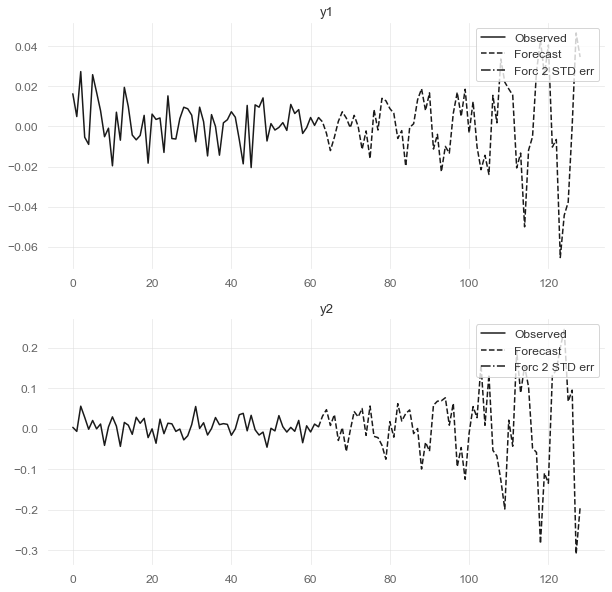

In [43]:
# make prediction
VARprediction = VARmodelresult.forecast(VARmodelresult.y, steps=66)
Q3plotVAR = VARmodelresult.plot_forecast(66)

Evaluating performance using Q3 Log Returns.

We have the forecasted daily returns and will use these forecasts as a direction to entry:

* If the forecasted daily return is positive we enter Long, if negative we enter short, positions will be closed same day at market close. 

In [44]:
Q3SIGlist = pd.DataFrame(VARprediction, columns = ['GLD pred','ESX1 pred'])
Q3Loglist = pd.DataFrame(Q3VARtest, columns = ['Gold Q3 Log Retunrs','ESX1 Q3 Log Retunrs'])
Q3Dailysignal = np.where(Q3SIGlist > 0, 1, -1)
Q3SIGlist = pd.DataFrame(Q3Dailysignal, columns = ['GLD Signal','ESX1 Signal'])
y2=(Q3SIGlist['GLD Signal'] + Q3Loglist['Gold Q3 Log Retunrs'])*(Q3SIGlist['ESX1 Signal'] + Q3Loglist['ESX1 Q3 Log Retunrs'])
Q3VARreturn = y2.abs() - 1
sum(Q3VARreturn)

0.073654084322756

In [45]:
print(qs.stats.sharpe(Q3VARreturn)) #Sharp Ratio: 0.94
print(qs.stats.avg_loss(Q3VARreturn, aggregate=None, compounded=True)) #Average Loss: -1.2%
print(qs.stats.max_drawdown(Q3VARreturn)) #Max Drawdown: -10%
print(qs.stats.worst(Q3VARreturn)) # Worst trading day: -4%

0.9427492557770663
-0.012056422631452162
-0.10454621069855496
-0.03997444053532173


In Q3, Return of Gold and Equity ETF portfolio is 7.3%.

* Sharp Ratio: 0.94.
* Average Loss: -1.2%
* Max Drawdown: -10%
* Worst trading day: -4%

Using Q3 data for estimation, and Q4 data for evaluating performance. 

After running some tests and models, we found maxlags = 25 seems the best fit with the lowest AIC and highest Log likelihood.

In [46]:
# fit model
Q4VARmodel = VAR(Q3VARtest)
Q4VARmodelresult = Q4VARmodel.fit(maxlags=25)
Q4VARmodelresult.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 26, Apr, 2021
Time:                     10:54:36
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -139.840
Nobs:                     41.0000    HQIC:                  -142.550
Log likelihood:           2939.75    FPE:                1.52634e-63
AIC:                     -144.103    Det(Omega_mle):     3.03139e-64
--------------------------------------------------------------------
Results for equation y1
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const         -0.003079              NAN              NAN             NAN
L1.y1         -0.284320         0.000000     -5370754.587           0.000
L1.y2          0.135254              NAN              NAN             NAN
L2.y1          0.

In [47]:
# make prediction
Q4VARprediction = Q4VARmodelresult.forecast(Q4VARmodelresult.y, steps=65)

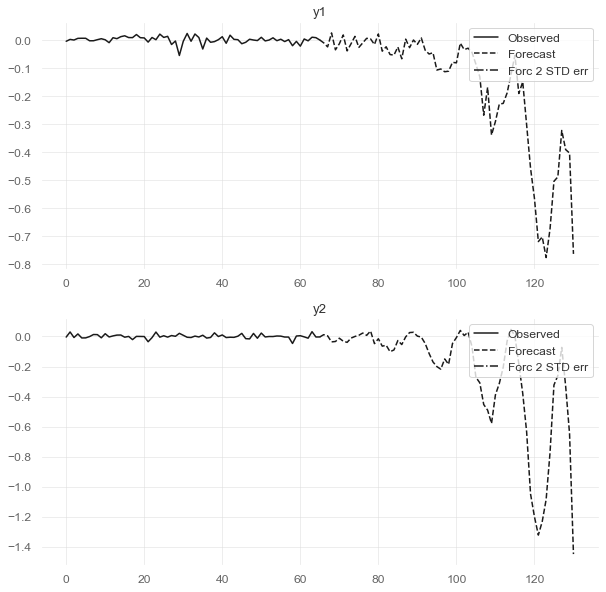

In [48]:
Q4plotVAR = Q4VARmodelresult.plot_forecast(65)

Evaluating performance using Q4 Log Returns.

We have the forecasted daily returns and will use these forecasts as a direction to entry:

* If the forecasted daily return is positive we enter Long, if negative we enter short, positions will be closed same day at market close. 

In [49]:
Q4SIGlist = pd.DataFrame(Q4VARprediction, columns = ['GLD pred','ESX1 pred'])
Q4Loglist = pd.DataFrame(Q4VARtest, columns = ['Gold Q4 Log Retunrs','ESX1 Q4 Log Retunrs'])
Q4Dailysignal = np.where(Q4SIGlist > 0, 1, -1)
Q4SIGlist = pd.DataFrame(Q4Dailysignal, columns = ['GLD Signal','ESX1 Signal'])
Q4net=(Q4SIGlist['GLD Signal']+Q4Loglist['Gold Q4 Log Retunrs'])*(Q4SIGlist['ESX1 Signal']+Q4Loglist['ESX1 Q4 Log Retunrs'])
Q4VARreturn = Q4net.abs() - 1
sum(Q4VARreturn)

0.07473291109970881

In [50]:
print(qs.stats.sharpe(Q4VARreturn)) #Sharp Ratio: 1.2
print(qs.stats.avg_loss(Q4VARreturn, aggregate=None, compounded=True)) #Average Loss: -0.8%
print(qs.stats.max_drawdown(Q4VARreturn)) #Max Drawdown: -8.6%
print(qs.stats.worst(Q4VARreturn)) # Worst trading day: -3%

1.2162785633502256
-0.008497136681428723
-0.08674019220880647
-0.02927952394931488


In Q4, Return of Gold and Equity ETF portfolio is 7.4%. Almost the same as in Q3, based on this we can conclude that our startegy provides consistent returns.

* Sharp Ratio: 1.2.
* Average Loss: -0.8%
* Max Drawdown: -8.6%
* Worst trading day: -3%



# The 2nd strategy should include multivariate GARCH

*Python for Finance Cookbook, Eryk Lewinson, First published: January 2020 Production reference: 1300120, ISBN: 978-1-78961-851-8, www.packt.com

Using the above book, we are implimenting here Constant Conditional Correlation GARCH (CCC-GARCH).

* Q2 CCC-GARCH(2,2).

In [51]:
#Q2: Specify the risky assets and the time horizon:
RISKY_ASSETS = ['GLD', 'EXS1.DE'] 
N = len(RISKY_ASSETS)
START_DATE = '2020-04-01'
END_DATE = '2020-06-30'
#Download data from Yahoo Finance:
df = yf.download(RISKY_ASSETS, start=START_DATE, end=END_DATE, adjusted=True)
#Calculate daily returns:
returns = 100 * df['Adj Close'].pct_change().dropna() 
#returns.plot(subplots=True, title=f'Stock returns: {START_DATE} - {END_DATE}')

#Define lists for storing objects:
coeffs = [] 
cond_vol = [] 
std_resids = [] 
models = []
#Estimate the univariate GARCH models:
for asset in returns.columns:
    model = arch_model(returns[asset], mean='Constant', vol='GARCH', p=2, o=0, q=2).fit(update_freq=0, disp='off')
    coeffs.append(model.params)
    cond_vol.append(model.conditional_volatility)
    std_resids.append(model.resid / model.conditional_volatility)
    models.append(model)
#Store the results in DataFrames:   
coeffs_df = pd.DataFrame(coeffs, index=returns.columns) 
cond_vol_df = pd.DataFrame(cond_vol).transpose().set_axis(returns.columns,axis='columns', inplace=False)
std_resids_df = pd.DataFrame(std_resids).transpose().set_axis(returns.columns,axis='columns', inplace=False)
#Calculate the constant conditional correlation matrix (R):
R = std_resids_df.transpose().dot(std_resids_df).div(len(std_resids_df))
#Calculate the one-step-ahead forecast of the conditional covariance matrix:
diag = []
D = np.zeros((N, N))
for model in models: 
    diag.append(model.forecast(horizon=1).variance.values[-1][0])
diag = np.sqrt(np.array(diag)) 
np.fill_diagonal(D, diag)
H = np.matmul(np.matmul(D, R.values), D)

[*********************100%***********************]  2 of 2 completed


In [52]:
print(coeffs_df)
print(R)
print(H)

               mu         omega      alpha[1]      alpha[2]   beta[1]  \
EXS1.DE  0.336576  8.244324e-12  4.904266e-13  2.225527e-12  0.038599   
GLD      0.160406  0.000000e+00  0.000000e+00  0.000000e+00  0.983278   

              beta[2]  
EXS1.DE  9.437885e-01  
GLD      1.512290e-12  
          EXS1.DE       GLD
EXS1.DE  1.030480 -0.041039
GLD     -0.041039  1.088477
[[ 3.53718279 -0.05482783]
 [-0.05482783  0.56598418]]


* Q3 CCC-GARCH(1,1).

In [53]:
#Q3: Specify the risky assets and the time horizon:
Q3RISKY_ASSETS = ['GLD', 'EXS1.DE'] 
Q3N = len(RISKY_ASSETS)
Q3START_DATE = '2020-07-01'
Q3END_DATE = '2020-09-30'
#Download data from Yahoo Finance:
Q3df = yf.download(Q3RISKY_ASSETS, start=Q3START_DATE, end=Q3END_DATE, adjusted=True)
#Calculate daily returns:
Q3returns = 100 * Q3df['Adj Close'].pct_change().dropna() 
#returns.plot(subplots=True, title=f'Stock returns: {START_DATE} - {END_DATE}')

#Define lists for storing objects:
Q3coeffs = [] 
Q3cond_vol = [] 
Q3std_resids = [] 
Q3models = []
#Estimate the univariate GARCH models:
for asset in Q3returns.columns:
    Q3model = arch_model(Q3returns[asset], mean='Constant', vol='GARCH', p=1, o=0, q=1).fit(update_freq=0, disp='off')
    Q3coeffs.append(Q3model.params)
    Q3cond_vol.append(Q3model.conditional_volatility)
    Q3std_resids.append(Q3model.resid / Q3model.conditional_volatility)
    Q3models.append(Q3model)
#Store the results in DataFrames:   
Q3coeffs_df = pd.DataFrame(Q3coeffs, index=Q3returns.columns) 
Q3cond_vol_df = pd.DataFrame(Q3cond_vol).transpose().set_axis(Q3returns.columns,axis='columns', inplace=False)
Q3std_resids_df = pd.DataFrame(Q3std_resids).transpose().set_axis(Q3returns.columns,axis='columns', inplace=False)
#Calculate the constant conditional correlation matrix (R):
Q3R = Q3std_resids_df.transpose().dot(Q3std_resids_df).div(len(Q3std_resids_df))
#Calculate the one-step-ahead forecast of the conditional covariance matrix:
Q3diag = []
Q3D = np.zeros((Q3N, Q3N))
for model in Q3models: 
    Q3diag.append(Q3model.forecast(horizon=1).variance.values[-1][0])
Q3diag = np.sqrt(np.array(Q3diag)) 
np.fill_diagonal(Q3D, Q3diag)
Q3H = np.matmul(np.matmul(Q3D, Q3R.values), Q3D)

[*********************100%***********************]  2 of 2 completed


In [54]:
print(Q3coeffs_df)
print(Q3R)
print(Q3H)

               mu     omega  alpha[1]   beta[1]
EXS1.DE  0.071480  1.624857  0.000000  0.121383
GLD      0.084882  0.137394  0.253926  0.714039
          EXS1.DE       GLD
EXS1.DE  0.999214  0.037323
GLD      0.037323  0.966064
[[1.31655506 0.04917611]
 [0.04917611 1.27287677]]


# 3rd strategy: attempt to include cointegration. If cointegration is not found, then we will justify the lack of existence for cointegration in quantitative terms.

# Modelling Cointegration
Using Q2 data, Testing all the 3 combinations of cointegration using Engle-Granger.

* Gold (GLD) and Equity (ESX1) ETF prices 
* Gold (GLD) and Bitcoin prices
* Equity (ESX1) ETF and Bitcoin prices

In [55]:
Q2Gold = GoldETF['Adj Close'].iloc[0: 63] #Q2 data
Q2Stock = StockETF['Adj Close'].iloc[0: 61] #Q2 data
Q2BTC = BTCweek['Adj Close'].iloc[0: 64] #Q2 data
Q3Gold = GoldETF['Adj Close'].iloc[63: 127] #Q3 data
Q3Stock = StockETF['Adj Close'].iloc[61: 127] #Q3 data
Q3BTC = BTCweek['Adj Close'].iloc[64: 130] #Q3 data

First, we need to check whether the portfolio is stationary or not, 
if yes, then the instruments in the portfolio are cointegrated.

As we run the ADF test below, we concluded that only Q2 Gold data is stationary, based on that in Q2 none of the below portfolios are cointegrated. 

Moreover, after running Engle-Granger test for Cointegration, we can see that for all 3 combinations the P value is higher than 0.05, so we conclude that there are no cointegrating vectors.

In [56]:
print("Q2 Gold:", sts.adfuller(Q2Gold)) #Q2, checking for stationary, only Q2 data is stationary on th e 5% & 10% level
print("Q3 Gold:", sts.adfuller(Q3Gold)) #Q3 data

Q2 Gold: (-3.4415988817587437, 0.009619916712671359, 0, 62, {'1%': -3.540522678829176, '5%': -2.9094272025108254, '10%': -2.5923136524453696}, 181.84155044838735)
Q3 Gold: (-2.2006797365924715, 0.20599884418773806, 6, 57, {'1%': -3.5506699942762414, '5%': -2.913766394626147, '10%': -2.5946240473991997}, 234.48784503662256)


In [57]:
print("Q2 Stock:",sts.adfuller(Q2Stock)) #Q2, checking ESX1 for stationary, 
print("Q3 Stock:",sts.adfuller(Q3Stock)) #Q3 data, Based on Critical Values & P Value, the data is non-stationary.

Q2 Stock: (-1.6214564290058917, 0.4719658305309894, 0, 60, {'1%': -3.5443688564814813, '5%': -2.9110731481481484, '10%': -2.5931902777777776}, 212.7292696831982)
Q3 Stock: (-3.5909023989772133, 0.005937355287414989, 0, 65, {'1%': -3.5352168748293127, '5%': -2.9071540828402367, '10%': -2.5911025443786984}, 191.88563879725018)


In [58]:
print("Q2 BTC:",sts.adfuller(Q2BTC)) #Q2, checking BTC for stationary,
print("Q3 BTC:",sts.adfuller(Q3BTC)) #Q3 data, Based on Critical Values & P Value, the data is non-stationary.

Q2 BTC: (-1.88884585431815, 0.3373264292054561, 2, 61, {'1%': -3.542412746661615, '5%': -2.910236235808284, '10%': -2.5927445767266866}, 735.959199489068)
Q3 BTC: (-1.8014420564988782, 0.37974598798173903, 0, 65, {'1%': -3.5352168748293127, '5%': -2.9071540828402367, '10%': -2.5911025443786984}, 779.3492306942413)


Modelling Cointegration:

Q2 Gold (GLD) and Equity (ESX1) ETF prices, Cointegration Test

In [59]:
EG_TestQ2Gold = Q2Gold.drop(Q2Gold.index[[7,21,41]])
EG_TestQ2Stock = Q2Stock.drop(Q2Stock.index[[35]])

In [60]:
GEQ2eg_test = engle_granger(EG_TestQ2Gold, EG_TestQ2Stock, trend="n") #Engle-Granger Cointegration Test
GEQ2eg_test

Test Statistic,-1.535
P-value,0.446
ADF Lag length,0
Estimated Root ρ (γ+1),0.930


In [61]:
GEQ2eg_test.cointegrating_vector

Adj Close    1.000000
Adj Close   -1.669561
dtype: float64

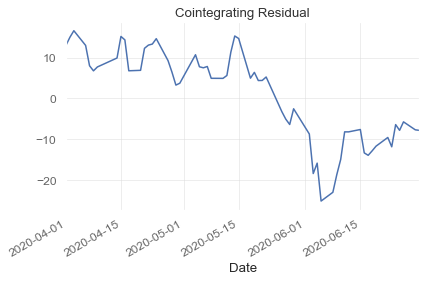

In [62]:
fig1 = GEQ2eg_test.plot()

Using the Johannsen test for cointegration.

But as the Trace value 15.31 is lower then the ciritcal values compared to all levels (5%, 1%), we conclude there is no cointegration.

In [63]:
Q2GEJ = pd.DataFrame({'x':EG_TestQ2Gold,'y':EG_TestQ2Stock}) #Q2: Gold (GLD) and Equity (ESX1) ETF prices,
Q2GEJT = coint_johansen(Q2GEJ, 0, 1)

In [64]:
print(f'Max Eig: {Q2GEJT.max_eig_stat[0]}, {Q2GEJT.max_eig_stat_crit_vals[0]}')
print(f'Trace: {Q2GEJT.trace_stat[0]}, {Q2GEJT.trace_stat_crit_vals[0]}')

Max Eig: 12.228453584638816, [12.2971 14.2639 18.52  ]
Trace: 15.317027966565577, [13.4294 15.4943 19.9349]


Q2 Gold (GLD) and BTC prices, Cointegration Test

In [65]:
EG_TestQ2BTC = Q2BTC.drop(Q2BTC.index[[7,37]]) #Drop Holidays 10 Apr
GBEG_TestQ2Gold = Q2Gold.drop(Q2Gold.index[[10]]) #Drop 16 April

In [66]:
GBQ2eg_test = engle_granger(GBEG_TestQ2Gold, EG_TestQ2BTC, trend="n") #Engle-Granger Cointegration Test

In [67]:
GBQ2eg_test.cointegrating_vector

Adj Close    1.000000
Adj Close   -0.018164
dtype: float64

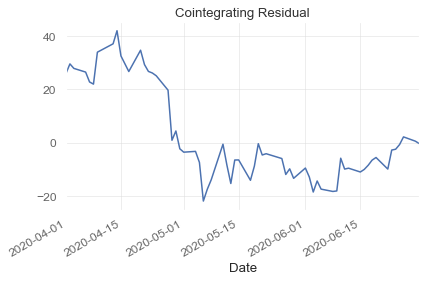

In [68]:
fig2 = GBQ2eg_test.plot()

Using the Johannsen test for cointegration.

The Trace value 13.77 is lower then the ciritcal value 15.49 at the 5% level, and based on the 5% level, we conclude there is no cointegration.


In [69]:
Q2GBJ = pd.DataFrame({'x':GBEG_TestQ2Gold,'y':EG_TestQ2BTC}) #Q2: Gold (GLD) and BTC prices,
Q2GBJT = coint_johansen(Q2GBJ, 0, 1)

In [70]:
print(f'Max Eig: {Q2GBJT.max_eig_stat[0]}, {Q2GBJT.max_eig_stat_crit_vals[0]}')
print(f'Trace: {Q2GBJT.trace_stat[0]}, {Q2GBJT.trace_stat_crit_vals[0]}')

Max Eig: 9.30166217985927, [12.2971 14.2639 18.52  ]
Trace: 13.77132733664017, [13.4294 15.4943 19.9349]


Q2 Equity (ESX1) ETF and Bitcoin prices, Cointegration Test

In [71]:
EBEG_TestQ2BTC = Q2BTC.drop(Q2BTC.index[[7,8,21,42]]) # Drop due to Dax Holidays 
EBEG_TestQ2Stock = Q2Stock.drop(Q2Stock.index[[9]]) # Drop 16 April

In [72]:
EBQ2eg_test = engle_granger(EBEG_TestQ2Stock, EBEG_TestQ2BTC, trend="n") #Engle-Granger Cointegration Test
EBQ2eg_test

Test Statistic,-2.008
P-value,0.233
ADF Lag length,0
Estimated Root ρ (γ+1),0.875


In [73]:
EBQ2eg_test.cointegrating_vector

Adj Close    1.000000
Adj Close   -0.010878
dtype: float64

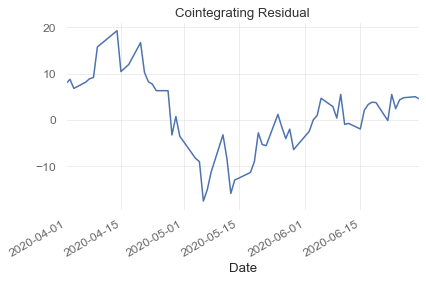

In [74]:
fig3 = EBQ2eg_test.plot()

Using the Johannsen test for cointegration.

But as the Trace value 7.06 is lower then the ciritcal values compared to all levels (10%, 5%, 1%), we conclude there is no cointegration.

In [75]:
Q2EBJ = pd.DataFrame({'x':EBEG_TestQ2BTC,'y':EBEG_TestQ2Stock}).fillna(0).values #Q2: Equity (ESX1) ETF and Bitcoin prices,

In [76]:
Q2EBJT = coint_johansen(Q2EBJ, 0, 1)

In [77]:
print(f'Max Eig: {Q2EBJT.max_eig_stat[0]}, {Q2EBJT.max_eig_stat_crit_vals[0]}')
print(f'Trace: {Q2EBJT.trace_stat[0]}, {Q2EBJT.trace_stat_crit_vals[0]}')

Max Eig: 4.627944013142722, [12.2971 14.2639 18.52  ]
Trace: 7.060608943731432, [13.4294 15.4943 19.9349]


Using Q3 data, Testing all the 3 combinations of cointegration using Engle-Granger.

As it can be seen below, after running Engle-Granger test for Cointegration in Q3, we can see that for all 3 combinations the P value is higher than 0.05, so we conclude that there are no cointegrating vectors.

In [78]:
EG_TestQ3Stock = Q3Stock.drop(Q3Stock.index[[2,48]]) #Remove US Holidays 3 Jul, 7 Sept

In [79]:
GEQ3eg_test = engle_granger(Q3Gold, EG_TestQ3Stock, trend="n") #Engle-Granger Cointegration Test
GEQ3eg_test

Test Statistic,-2.072
P-value,0.210
ADF Lag length,0
Estimated Root ρ (γ+1),0.874


In [80]:
GEQ3eg_test.cointegrating_vector

Adj Close    1.000000
Adj Close   -1.638555
dtype: float64

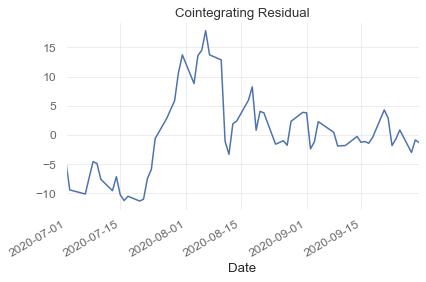

In [81]:
fig4 = GEQ3eg_test.plot()

Using the Johannsen test for cointegration.

The Trace value 13.81 is lower then the ciritcal value 15.49 at the 5% level, and based on the 5% level, we conclude there is no cointegration.

In [82]:
Q3GEJ = pd.DataFrame({'x':Q3Gold,'y':EG_TestQ3Stock}) #Q3: Gold (GLD) and Equity (ESX1) ETF prices,
Q3GEJT = coint_johansen(Q3GEJ, 0, 1)

In [83]:
print(f'Max Eig: {Q3GEJT.max_eig_stat[0]}, {Q3GEJT.max_eig_stat_crit_vals[0]}')
print(f'Trace: {Q3GEJT.trace_stat[0]}, {Q3GEJT.trace_stat_crit_vals[0]}')

Max Eig: 8.893530343046248, [12.2971 14.2639 18.52  ]
Trace: 13.819400143104076, [13.4294 15.4943 19.9349]


Q3: Gold (GLD) and Bitcoin prices, Cointegration Test

In [84]:
EG_TestQ3BTC = Q3BTC.drop(Q3BTC.index[[2,48]]) #Remove US Holidays 3 Jul, 7 Sept

In [85]:
GBQ3eg_test = engle_granger(Q3Gold, EG_TestQ3BTC, trend="n") #Engle-Granger Cointegration Test
GBQ3eg_test

Test Statistic,-2.237
P-value,0.156
ADF Lag length,0
Estimated Root ρ (γ+1),0.864


In [86]:
GBQ3eg_test.cointegrating_vector

Adj Close    1.000000
Adj Close   -0.016759
dtype: float64

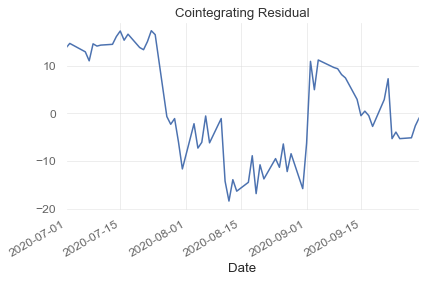

In [87]:
fig5 = GBQ3eg_test.plot()

Using the Johannsen test for cointegration.

As the Trace value 12.11 is lower then the ciritcal values, we conclude there is no cointegration.


In [88]:
Q3GBJ = pd.DataFrame({'x':Q3Gold,'y':EG_TestQ3BTC}) #Q3: Gold (GLD) and Bitcoin prices,
Q3GBJT = coint_johansen(Q3GBJ, 0, 1)

In [89]:
print(f'Max Eig: {Q3GBJT.max_eig_stat[0]}, {Q3GBJT.max_eig_stat_crit_vals[0]}')
print(f'Trace: {Q3GBJT.trace_stat[0]}, {Q3GBJT.trace_stat_crit_vals[0]}')

Max Eig: 7.778871186189341, [12.2971 14.2639 18.52  ]
Trace: 12.113608884292194, [13.4294 15.4943 19.9349]


Q3: Equity (ESX1) ETF and Bitcoin prices, Cointegration Test

In [90]:
EBQ3eg_test = engle_granger(Q3Stock, Q3BTC, trend="n") #Engle-Granger Cointegration Test
EBQ3eg_test

Test Statistic,-1.732
P-value,0.350
ADF Lag length,0
Estimated Root ρ (γ+1),0.922


In [91]:
EBQ3eg_test.cointegrating_vector

Adj Close    1.000000
Adj Close   -0.010227
dtype: float64

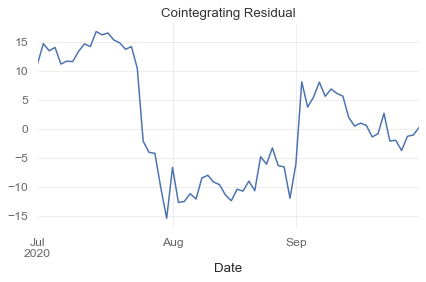

In [92]:
fig6 = EBQ3eg_test.plot()

Using the Johannsen test for cointegration.

As the Trace value 10.73 is lower then the ciritcal values, we fail to reject the null hypothesis (and conclude there is no cointegration.)


In [93]:
Q3EBJ = pd.DataFrame({'x':Q3Stock,'y':Q3BTC}) #Q3: Equity (ESX1) ETF and Bitcoin prices,

In [94]:
Q3EBJT = coint_johansen(Q3EBJ, 0, 1)

In [95]:
print(f'Max Eig: {Q3EBJT.max_eig_stat[0]}, {Q3EBJT.max_eig_stat_crit_vals[0]}')
print(f'Trace: {Q3EBJT.trace_stat[0]}, {Q3EBJT.trace_stat_crit_vals[0]}')

Max Eig: 7.441573132931484, [12.2971 14.2639 18.52  ]
Trace: 10.735921923711276, [13.4294 15.4943 19.9349]


After running Engle-Granger & Johannsen test, we conclude that there is no cointegration for any of all 3 portfolio combinations. 

Thus we cannot build any strategies on these data sets. 

# Now you have a total of 5 models (including 2 from the previous question).  Which of the 5 models do you prefer? Explain in quantitative terms

We like our VAR model as it made a consistent return in Q3 7.3% & Q4 7.4%, in total almost 15%. AVG loss are very low in both Quarters around -1%, Max Drawdown did not exceed -10%, which is acceptable.

# Category 3 Models: Use all 3 variables: the one you are trading

Build 3 trading strategies. The 1st strategy should include a form of VAR or VARMA.

* First strategy is a VARMA model. After running some tests and models, we found that VARMA (12,12) model seems a good fit as this model provides the highest return.

Using Q2 data for estimation, and Q3 data for evaluating performance. (Note, running these VARMA models will take some time.)

In [96]:
Q2BTCReturn = BTCplot['Log Returns'].iloc[0:61].dropna() #Q2 data
Q3BTCReturn = BTCplot['Log Returns'].iloc[61: 127] #Q3 data
Q4BTCReturn = BTCplot['Log Returns'].iloc[127: 189] #Q4 data

In [97]:
Q2VARMA = {'Gold Q2 Log Retunrs':Q2GoldReturn,'ESX1 Q2 Log Retunrs':Q2StockReturn,'BTC Q2 Log Retunrs':Q2BTCReturn}
Q2VARMAdf = pd.DataFrame(Q2VARMA)
Q2VARMAtest = Q2VARMAdf.fillna(0).values
Q3VARMA = {'Gold Q3 Log Retunrs':Q3GoldReturn,'ESX1 Q3 Log Retunrs':Q3StockReturn,'BTC Q3 Log Retunrs':Q3BTCReturn}
Q3VARMAdf = pd.DataFrame(Q3VARMA)
Q3VARMAtest = Q3VARMAdf.fillna(0).values

In [98]:
# fit model
Q2VARMAmodel = VARMAX(Q2VARMAtest, order=(12, 12), trend='c', enforce_stationarity=True, enforce_invertibility=True)
Q2VARMAresult = Q2VARMAmodel.fit(disp=False)
Q2VARMAresult.summary()

Dep. Variable:,"['y1', 'y2', 'y3']",No. Observations:,63
Model:,"VARMA(12,12)",Log Likelihood,578.090
,+ intercept,AIC,-706.180
Date:,"Mon, 26 Apr 2021",BIC,-223.975
Time:,10:59:41,HQIC,-516.527
Sample:,0,,
,- 63,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.03, 0.16, 0.02",Jarque-Bera (JB):,"2.65, 2.15, 1.31"
Prob(Q):,"0.87, 0.69, 0.88",Prob(JB):,"0.27, 0.34, 0.52"
Heteroskedasticity (H):,"0.50, 0.42, 0.77",Skew:,"0.41, -0.23, -0.31"


In [99]:
# make prediction
Q3VARMAprediction = Q2VARMAresult.forecast(steps=66)

Evaluating performance using Q3 Log Returns.

We have the forecasted daily returns and will use these forecasts as a direction to entry:

* If the forecasted daily return is positive we enter Long, if negative we enter short, positions will be closed same day at market close. 

In [100]:
Q3Vsig = pd.DataFrame(Q3VARMAprediction, columns = ['GLD pred','ESX1 pred', 'BTC pred'])
Q3VLoglist = pd.DataFrame(Q3VARMAtest, columns = ['Gold Q3 Log Retunrs','ESX1 Q3 Log Retunrs','BTC Q3 Log Retunrs'])
Q3VDailysignal = np.where(Q3Vsig > 0, 1, -1)
Q3VSIGlist = pd.DataFrame(Q3VDailysignal, columns = ['GLD Signal','ESX1 Signal','BTC Signal'])
Q3Vnet=((Q3VSIGlist['GLD Signal']+Q3VLoglist['Gold Q3 Log Retunrs'])*
(Q3VSIGlist['ESX1 Signal']+Q3VLoglist['ESX1 Q3 Log Retunrs'])*(Q3VSIGlist['BTC Signal']+Q3VLoglist['BTC Q3 Log Retunrs']))
Q3VARMAreturn = Q3Vnet.abs() - 1
sum(Q3VARMAreturn)

0.25109406667756984

In [101]:
print(qs.stats.sharpe(Q3VARMAreturn)) #Sharp Ratio: 1.8
print(qs.stats.avg_loss(Q3VARMAreturn, aggregate=None, compounded=True)) #Average Loss: -2.4%
print(qs.stats.max_drawdown(Q3VARMAreturn)) #Max Drawdown: -28%
print(qs.stats.worst(Q3VARMAreturn)) # Worst trading day: -14%

1.7930259370814754
-0.024461758666199315
-0.28442349480656437
-0.1377727105893093


In Q3, Return of 3 asset portfolio: Gold, Equity ETF and Bitcoin is 25%. This VARMA model only provided long signals for Gold in Q3, despite Gold rallied in Q3, having only long singals on Gold does not seem very relaible.

* Sharp Ratio: 1.8.
* Average Loss: -2.4%
* Max Drawdown: -28%
* Worst trading day: -14%

Using Q3 data for estimation, and Q4 data for evaluating performance. After running some tests and models, we found that VARMA (3,8) model seems a good fit as this model provides the highest return.

In [102]:
Q4VARMA = {'Gold Q4 Log Retunrs':Q4GoldReturn,'ESX1 Q4 Log Retunrs':Q4StockReturn,'BTC Q4 Log Retunrs':Q4BTCReturn}
Q4VARMAdf = pd.DataFrame(Q4VARMA)
Q4VARMAtest = Q4VARMAdf.fillna(0).values

In [103]:
# fit model
Q3VARMAmodel = VARMAX(Q3VARMAtest, order=(3, 8), trend='c', enforce_stationarity=True, enforce_invertibility=True)
Q3VARMAresult = Q3VARMAmodel.fit(disp=False)
Q3VARMAresult.summary()

Dep. Variable:,"['y1', 'y2', 'y3']",No. Observations:,66
Model:,"VARMA(3,8)",Log Likelihood,602.666
,+ intercept,AIC,-989.332
Date:,"Mon, 26 Apr 2021",BIC,-752.850
Time:,11:00:44,HQIC,-895.887
Sample:,0,,
,- 66,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.92, 0.34, 0.25",Jarque-Bera (JB):,"37.14, 0.92, 81.66"
Prob(Q):,"0.34, 0.56, 0.62",Prob(JB):,"0.00, 0.63, 0.00"
Heteroskedasticity (H):,"1.38, 1.27, 4.99",Skew:,"-1.12, -0.22, -1.44"


In [104]:
# make prediction
Q4VARMAprediction = Q3VARMAresult.forecast(steps=65)

Evaluating performance using Q4 Log Returns.

We have the forecasted daily returns and will use these forecasts as a direction to entry:

* If the forecasted daily return is positive we enter Long, if negative we enter short, positions will be closed same day at market close.



In [105]:
Q4Vsig = pd.DataFrame(Q4VARMAprediction, columns = ['GLD pred','ESX1 pred', 'BTC pred'])
Q4VLoglist = pd.DataFrame(Q4VARMAtest, columns = ['Gold Q4 Log Retunrs','ESX1 Q4 Log Retunrs','BTC Q4 Log Retunrs'])
Q4VDailysignal = np.where(Q4Vsig > 0, 1, -1)
Q4VSIGlist = pd.DataFrame(Q4VDailysignal, columns = ['GLD Signal','ESX1 Signal','BTC Signal'])
Q4Vnet=((Q4VSIGlist['GLD Signal']+Q4VLoglist['Gold Q4 Log Retunrs'])*
(Q4VSIGlist['ESX1 Signal']+Q4VLoglist['ESX1 Q4 Log Retunrs'])*(Q4VSIGlist['BTC Signal']+Q4VLoglist['BTC Q4 Log Retunrs']))
Q4VARMAreturn = Q4Vnet.abs() - 1
sum(Q4VARMAreturn)

0.8619744043061371

In [106]:
print(qs.stats.sharpe(Q4VARMAreturn)) #Sharp Ratio: 5.6
print(qs.stats.avg_loss(Q4VARMAreturn, aggregate=None, compounded=True)) #Average Loss: -2%
print(qs.stats.max_drawdown(Q4VARMAreturn)) #Max Drawdown: -11%
print(qs.stats.worst(Q4VARMAreturn)) # Worst trading day: -8.5%

5.602722516251622
-0.021362522226680277
-0.11654872287625895
-0.0851282922504858


In Q4, Return of 3 asset portfolio: Gold, Equity ETF and Bitcoin is 86 %. This VARMA model provided mainly long signals in Q4, because of that we entered long BTC almost every day, which skyrocketed in Q4, so our great return is due to BTC.

* Sharp Ratio: 5.6.
* Average Loss: -2%
* Max Drawdown: -11%
* Worst trading day: -8.5%

# 7.6 & 7.7
* The 2nd strategy should attempt to include cointegration.  Note there can be cointegration between (y, x1);  or (y; x2);  or(y, x1, x2).  If none of these cointegrations exists, then justify the lack of existence for cointegration in quantitative terms.
* The 3rd strategy should attempt to include an error-correction model (ECM).  This will only work if there is cointegration in the previous part.

In part 6, As we proved there is no cointegration exist. ->So, we will not build any strategy which includes cointegration.

# Now you have a total of 8 models (including 5 from the previous 2 questions).  Which of the 8 models do you prefer? Explain in quantitative terms

Although, Our Varma model in total made 110% in Q3 & Q4, this is due to mainly BTC price doubled (rallied 100%) Q4, which does not happen in every Q, besides VARMA model`s return in Q4 on BTC is 81%, so we would have done better with a buy and hold strategy, conclusion our VARMA model cannot provide excess return,  Therefore we prefer VAR model as it shows consistent returns about 7.35% per Q, with Max Drawdown: -10% and  Worst trading day: -4% in Q4, we consider it as a low risk strategy.
Average Sharp Ratio is 1, which is accepable with these risk numbers. 

# Combining the Models

Choosing the models you think worked well, assign relative weights to those.  

As we choose the VAR model & ARIMA model, and both returned about 15% in total,

Thus we assign equal weights 50%-50%:
* 50% VAR model
* 50% ARIMA model

Derive an overall model that uses each selected model times its relative weight.

In [107]:
Combined_model = 0.15*0.5 + 0.16*0.5
print("Total Return of the Combined model is:", Combined_model*100, "%")

Total Return of the Combined model is: 15.5 %


How does this combined model compare to the individual models?

* The Combined model performs about 0.5% better then our VAR model.